In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("covid_data.csv", parse_dates=['Date'])
df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,India,33,29,4
1,2020-01-23,India,84,65,13
2,2020-01-24,India,125,93,18
3,2020-01-25,India,184,124,24
4,2020-01-26,India,228,156,31


In [4]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       300 non-null    datetime64[ns]
 1   Country    300 non-null    object        
 2   Confirmed  300 non-null    int64         
 3   Recovered  300 non-null    int64         
 4   Deaths     300 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 11.8+ KB


In [7]:
df.fillna(0, inplace=True)
df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deaths']
df.head()


,Date,Country,Confirmed,Recovered,Deaths,Active,New_Cases
0,2020-01-22,India,33,29,4,0,0.0
1,2020-01-23,India,84,65,13,6,51.0
2,2020-01-24,India,125,93,18,14,41.0
3,2020-01-25,India,184,124,24,36,59.0
4,2020-01-26,India,228,156,31,41,44.0


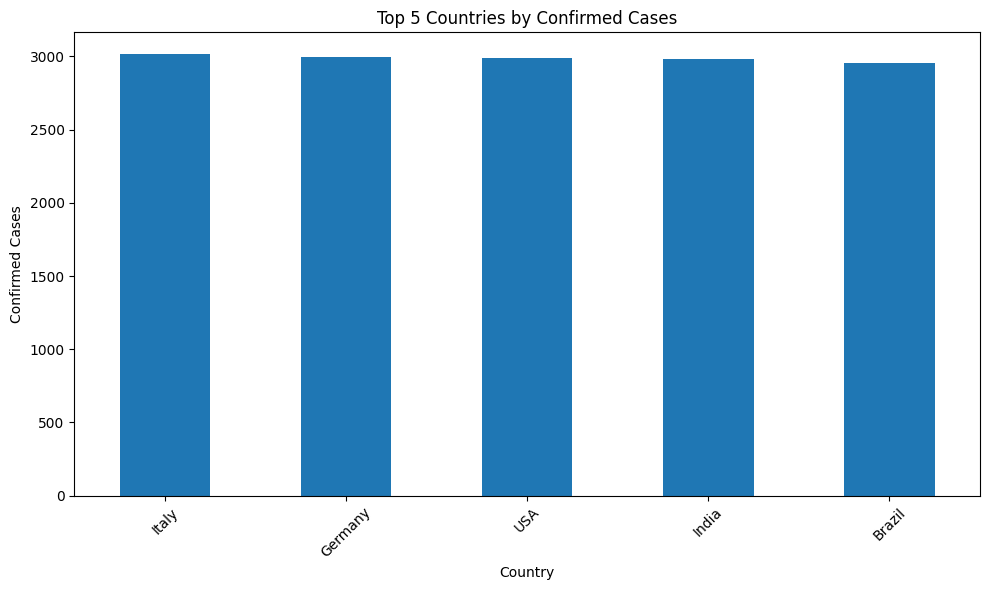

In [8]:
top10 = df.groupby("Country")["Confirmed"].max().sort_values(ascending=False).head(10)
top10.plot(kind='bar', figsize=(10, 6))
plt.title("Top 5 Countries by Confirmed Cases")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

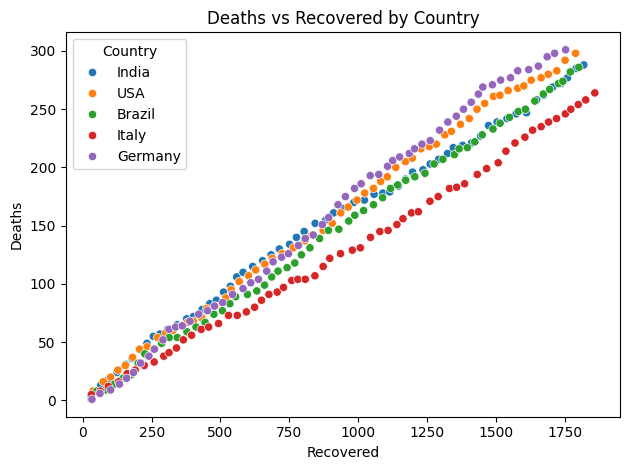

In [9]:
sns.scatterplot(data=df, x="Recovered", y="Deaths", hue="Country")
plt.title("Deaths vs Recovered by Country")
plt.tight_layout()
plt.show()

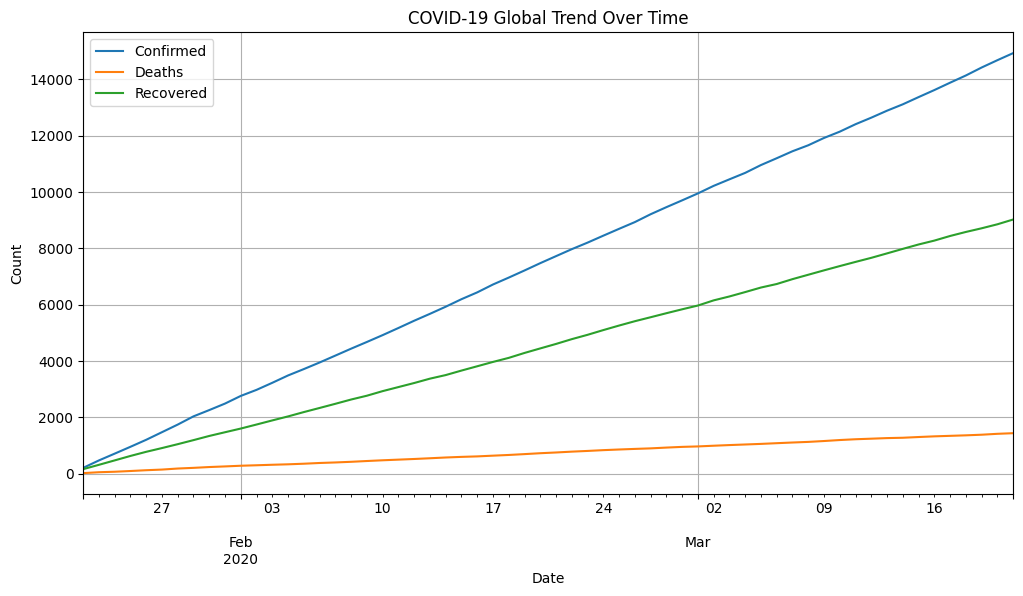

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
trend = df.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum()
trend.plot(figsize=(12,6))
plt.title("COVID-19 Global Trend Over Time")
plt.ylabel("Count")
plt.grid(True)
plt.show()

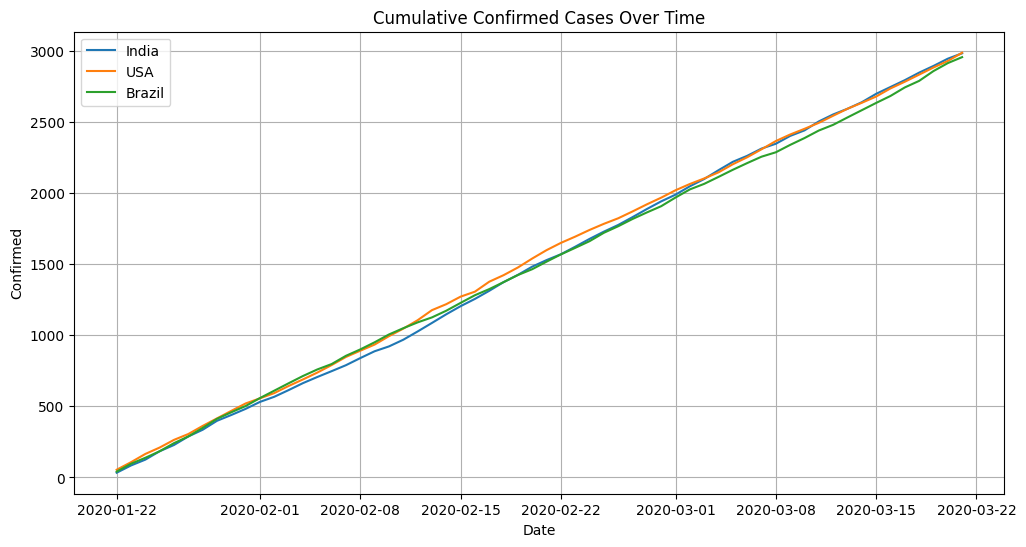

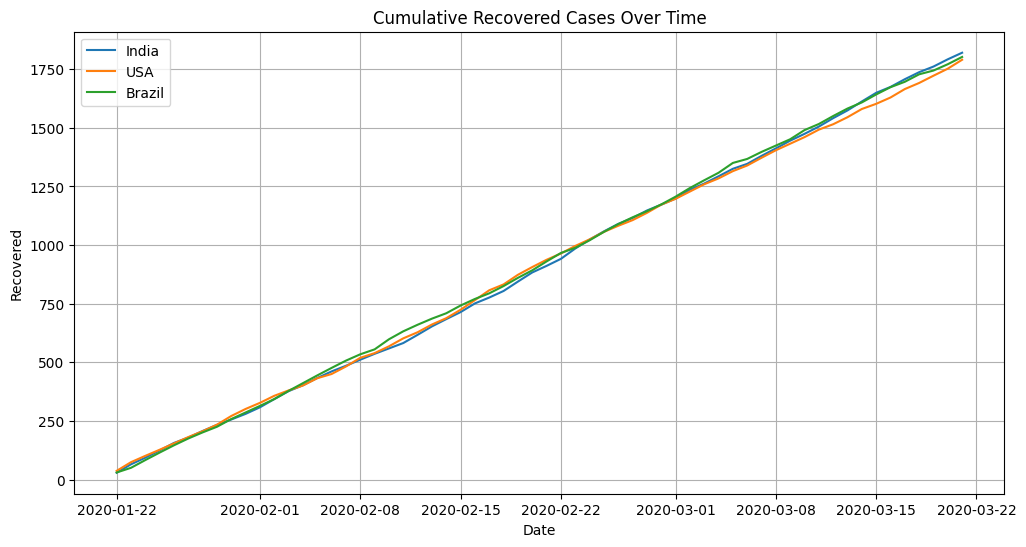

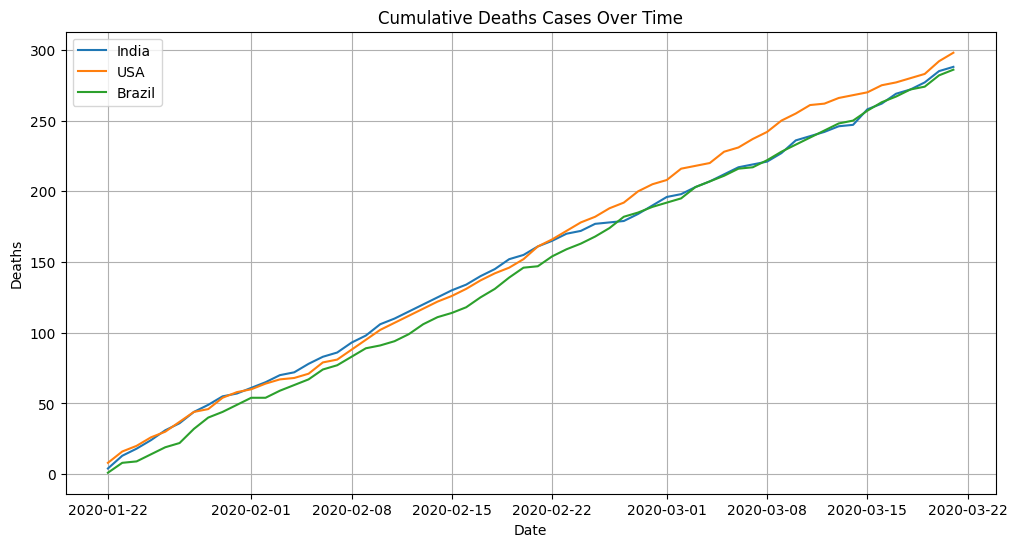

In [4]:
countries = ['India', 'USA', 'Brazil']

for col in ['Confirmed', 'Recovered', 'Deaths']:
    plt.figure(figsize=(12, 6))
    for country in countries:
        temp = df[df['Country'] == country]
        plt.plot(temp['Date'], temp[col], label=country)
    plt.title(f'Cumulative {col} Cases Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()


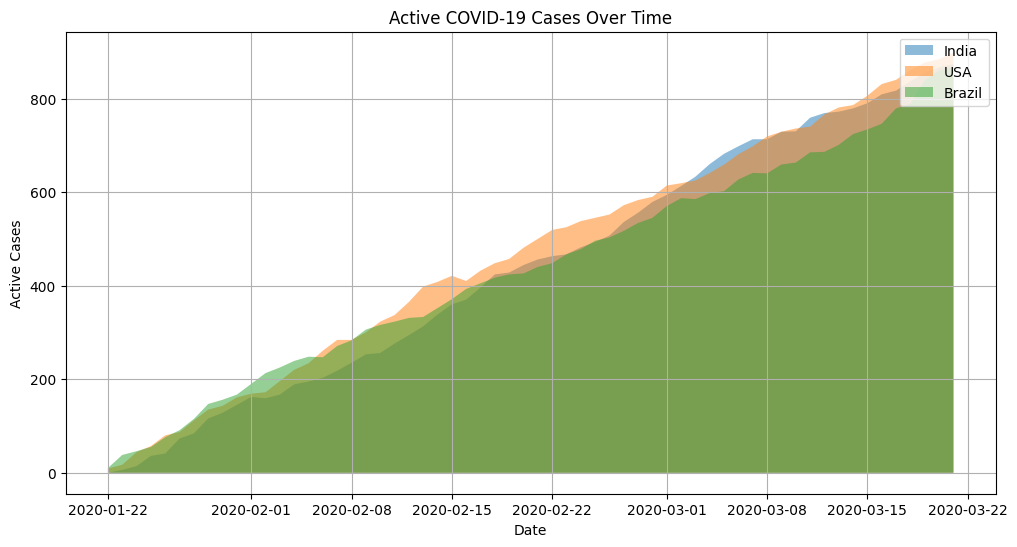

In [5]:
plt.figure(figsize=(12, 6))
for country in countries:
    temp = df[df['Country'] == country]
    plt.fill_between(temp['Date'], temp['Active'], alpha=0.5, label=country)
plt.title('Active COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)
plt.show()


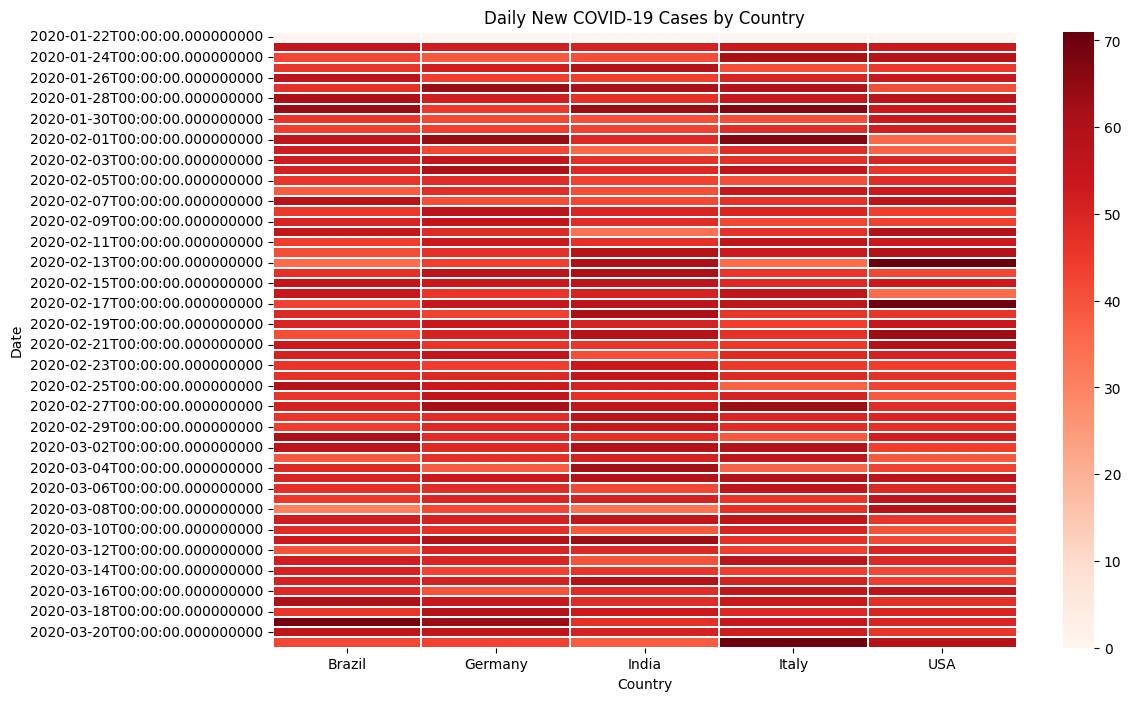

In [6]:
df['New_Cases'] = df.groupby('Country')['Confirmed'].diff().fillna(0)

heatmap_df = df.pivot_table(index='Date', columns='Country', values='New_Cases')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, cmap='Reds', linecolor='white', linewidths=0.1)
plt.title("Daily New COVID-19 Cases by Country")
plt.show()
